<a href="https://colab.research.google.com/github/purvamarkam/ML_LAB/blob/main/Assignmnet9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Any NaNs in X_scaled? False


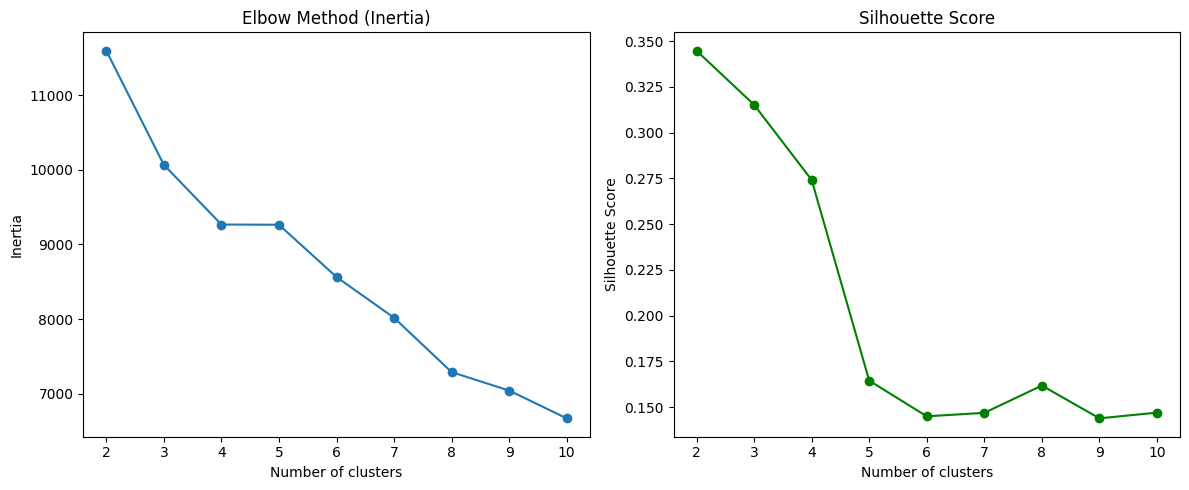

K-Means Homogeneity Score (k=4): 0.6307


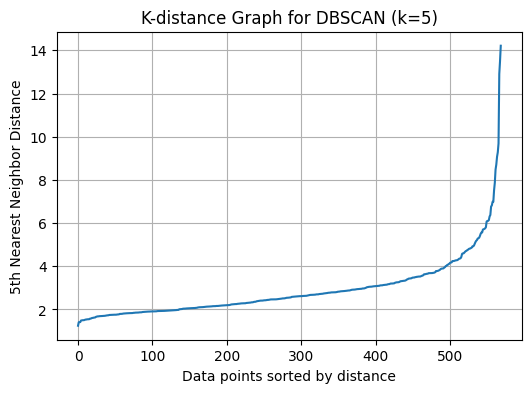

DBSCAN Homogeneity Score: 0.4656


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.neighbors import NearestNeighbors


# Load data
df = pd.read_csv("Cancer_Data.csv")

# STEP 1: Drop the useless column
df = df.drop(columns=['Unnamed: 32'])

# STEP 2: Drop rows that still contain any NaNs
df = df.dropna()

# STEP 3: Separate features and target
diagnosis = df['diagnosis']
X = df.drop(columns=['id', 'diagnosis'])

# STEP 4: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 5: Confirm everything is clean
print("Any NaNs in X_scaled?", np.isnan(X_scaled).any())

# K-MEANS CLUSTERING

inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

# Choose optimal k = 4
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_final.fit_predict(X_scaled)

# Evaluate with Homogeneity Score
diagnosis_encoded = LabelEncoder().fit_transform(diagnosis)
kmeans_homogeneity = homogeneity_score(diagnosis_encoded, kmeans_labels)
print(f"K-Means Homogeneity Score (k={optimal_k}): {kmeans_homogeneity:.4f}")

# DBSCAN CLUSTERING

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances to find the "elbow"
distance_values = np.sort(distances[:, 4])
plt.figure(figsize=(6, 4))
plt.plot(distance_values)
plt.title("K-distance Graph for DBSCAN (k=5)")
plt.xlabel("Data points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.grid()
plt.show()

# Based on graph, set eps value (try tuning it)
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Filter noise (-1) before computing homogeneity
valid_labels = dbscan_labels != -1
dbscan_homogeneity = homogeneity_score(
    diagnosis_encoded[valid_labels],
    dbscan_labels[valid_labels]
)
print(f"DBSCAN Homogeneity Score: {dbscan_homogeneity:.4f}")


Error: Make sure 'cancer_data.csv' is in the same directory.

--- K-Means Clustering ---


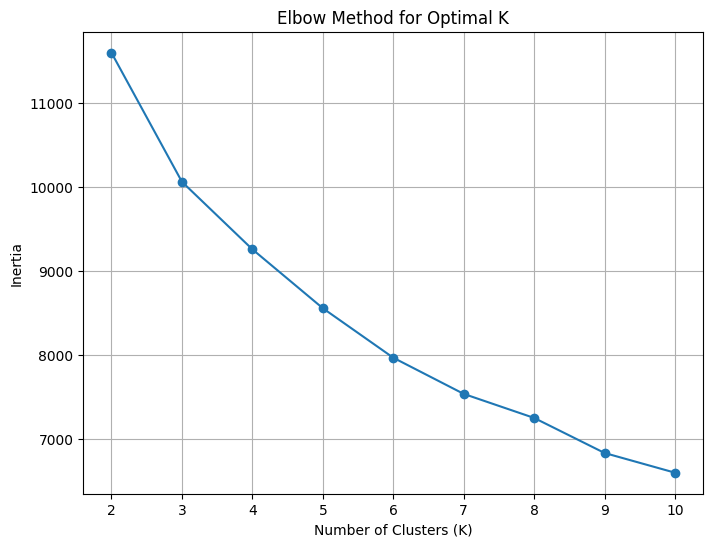

Observation (Elbow Method): Look for the 'elbow' or the point where the rate of decrease in inertia starts to slow down. This point can be a good indicator of the optimal number of clusters.


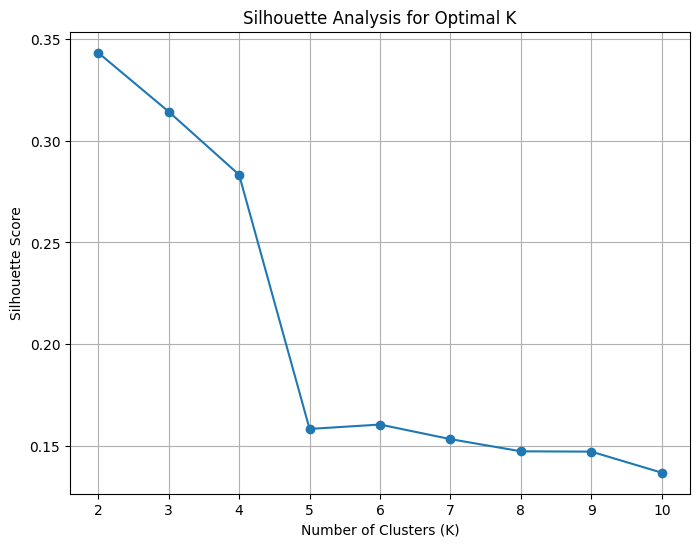

Observation (Silhouette Analysis): The silhouette score ranges from -1 to +1. Higher scores indicate that the object is well matched to its own cluster and poorly matched to neighboring clusters. Look for the K with the highest silhouette score.
Enter the optimal number of clusters (based on the plots): 4
Homogeneity Score (K-Means with 4 clusters): 0.6042
Observation (Homogeneity Score for K-Means): A homogeneity score close to 1 indicates that clusters contain mostly data points belonging to a single class (in this case, 'Malignant' or 'Benign'). A lower score suggests that clusters contain a mix of classes.

--- DBSCAN Clustering ---

Evaluating DBSCAN with different eps and min_samples:
eps=0.5, min_samples=5: Number of clusters = 0, Number of noise points = 569
eps=0.5, min_samples=10: Number of clusters = 0, Number of noise points = 569
eps=0.5, min_samples=15: Number of clusters = 0, Number of noise points = 569
eps=1.0, min_samples=5: Number of clusters = 0, Number of noise poi

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, homogeneity_score
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('Cancer_data.csv')
except FileNotFoundError:
    print("Error: Make sure 'cancer_data.csv' is in the same directory.")
    exit()

# 1. Drop 'Id' and 'Diagnosis' columns
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Scale the features - crucial for distance-based algorithms like K-Means and DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. K-Means Clustering
print("\n--- K-Means Clustering ---")

# a. Determine optimal number of clusters (2-10)
# i. Elbow Method with Inertia
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Observation for Elbow Method:
print("Observation (Elbow Method): Look for the 'elbow' or the point where the rate of decrease in inertia starts to slow down. This point can be a good indicator of the optimal number of clusters.")

# ii. Silhouette Analysis
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Observation for Silhouette Analysis:
print("Observation (Silhouette Analysis): The silhouette score ranges from -1 to +1. Higher scores indicate that the object is well matched to its own cluster and poorly matched to neighboring clusters. Look for the K with the highest silhouette score.")

# b. Use the diagnosis column to calculate homogeneity score
optimal_k = int(input("Enter the optimal number of clusters (based on the plots): "))
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_optimal.fit_predict(X_scaled)

homogeneity_kmeans = homogeneity_score(y, kmeans_labels)
print(f"Homogeneity Score (K-Means with {optimal_k} clusters): {homogeneity_kmeans:.4f}")
print("Observation (Homogeneity Score for K-Means): A homogeneity score close to 1 indicates that clusters contain mostly data points belonging to a single class (in this case, 'Malignant' or 'Benign'). A lower score suggests that clusters contain a mix of classes.")

# 3. DBScan Clustering
print("\n--- DBSCAN Clustering ---")

# a. Determine appropriate values of eps and min_samples parameters
# This often involves experimentation and understanding the data's density.
# We can try a range of values and observe the number of clusters and noise points.

# Let's try a few combinations (you might need to adjust these based on your data)
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

print("\nEvaluating DBSCAN with different eps and min_samples:")
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        n_noise = list(dbscan_labels).count(-1)
        print(f"eps={eps}, min_samples={min_samples}: Number of clusters = {n_clusters}, Number of noise points = {n_noise}")

print("\nObservation (DBSCAN Parameter Tuning): Finding the right 'eps' and 'min_samples' is crucial for DBSCAN. If 'eps' is too small, many points will be considered noise. If it's too large, clusters might merge. 'min_samples' controls the minimum number of points required to form a dense region.")

# Based on the observations above, choose appropriate values for eps and min_samples
optimal_eps = float(input("Enter the optimal value for eps: "))
optimal_min_samples = int(input("Enter the optimal value for min_samples: "))

dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = dbscan_optimal.fit_predict(X_scaled)

# b. Use the diagnosis column to calculate homogeneity score
homogeneity_dbscan = homogeneity_score(y, dbscan_labels)
print(f"Homogeneity Score (DBSCAN with eps={optimal_eps}, min_samples={optimal_min_samples}): {homogeneity_dbscan:.4f}")
print("Observation (Homogeneity Score for DBSCAN): Similar to K-Means, a higher homogeneity score for DBSCAN indicates that the identified clusters align well with the actual 'Malignant' and 'Benign' diagnoses. However, keep in mind that DBSCAN can also identify noise points (-1 label), which are not considered part of any cluster.")

# You can further analyze the clusters by looking at the distribution of 'Diagnosis' within each cluster.